### **PROJECT 3 PROPOSAL LEVEL 1**


**Idea: Cleaning Data**


 **Description:**


Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential part of data analysis, and demonstrating your data cleaning skills is key to landing a job. Here are some projects to test out your data cleaning skills:


 **Dataset:-** https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data


 **Key Concepts and Challenges:**


1. Data Integrity: Ensuring the accuracy, consistency, and reliability of data throughout the cleaning process.


2. Missing Data Handling: Dealing with missing values by either imputing them or making informed decisions on how to handle gaps in the dataset.


3. Duplicate Removal: Identifying and eliminating duplicate records to maintain data uniqueness.


4. Standardization: Consistent formatting and units across the dataset for accurate analysis.


5. Outlier Detection: Identifying and addressing outliers that may skew analysis or model performance.

In [14]:
# pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the AB_NYC_2019.csv dataset 
df = pd.read_csv("AB_NYC_2019.csv") 

In [16]:
# Initial Exploration
print(" Shape of Dataset:", df.shape)
print("\n Columns:\n", df.columns.tolist())
print("\n Missing Values:\n", df.isnull().sum())
print("\n Data Types:\n", df.dtypes)
print("\n Sample Data:\n", df.head())

 Shape of Dataset: (48895, 16)

 Columns:
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

 Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

 Data Types:
 id             

In [17]:
#  Handling Missing Data

# Drop rows where 'name' or 'host_name' is missing
df.dropna(subset=['name', 'host_name'], inplace=True)

# Fill missing 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Fill missing 'last_review' with placeholder or drop
df['last_review'].fillna('Not Reviewed', inplace=True)

In [18]:
#  Removing Duplicates
duplicates = df.duplicated().sum()
print(f"\n Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)


 Number of duplicate rows: 0


In [6]:
#  Standardizing Data

# Standardize text columns
df['neighbourhood_group'] = df['neighbourhood_group'].str.title().str.strip()
df['neighbourhood'] = df['neighbourhood'].str.title().str.strip()
df['room_type'] = df['room_type'].str.title().str.strip()

# Fix types: convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [7]:
#  Outlier Detection and Removal

# Remove listings with price = 0 or unreasonably high
df = df[(df['price'] > 0) & (df['price'] < 1000)]

# Remove listings with very high minimum nights
df = df[df['minimum_nights'] <= 365]

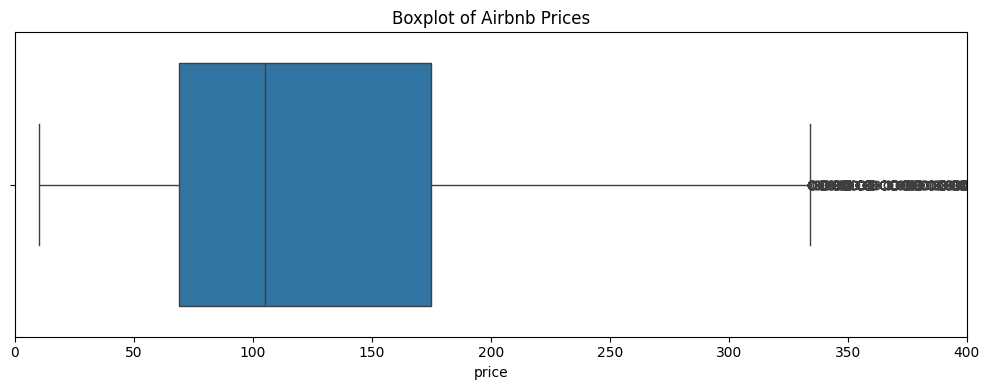

In [13]:
# Visualize Outliers 
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.xlim(0, 400)
plt.title("Boxplot of Airbnb Prices")
plt.tight_layout()
plt.show()

In [9]:
#  Final Dataset Summary
# -------------------------------------------------------------
print("\n Final Dataset Shape:", df.shape)
print("\n Summary Statistics:\n", df.describe())


 Final Dataset Shape: (48536, 16)

 Summary Statistics:
                  id       host_id      latitude     longitude         price  \
count  4.853600e+04  4.853600e+04  48536.000000  48536.000000  48536.000000   
mean   1.902895e+07  6.765573e+07     40.728919    -73.952030    140.285438   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.479342e+06  7.831209e+06     40.689990    -73.982950     69.000000   
50%    1.969114e+07  3.084914e+07     40.722960    -73.955580    105.000000   
75%    2.915297e+07  1.074344e+08     40.763123    -73.936100    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990    999.000000   
std    1.097846e+07  7.862327e+07      0.054579      0.046164    112.927008   

       minimum_nights  number_of_reviews                    last_review  \
count    48536.000000       48536.000000                          38668   
mean         6.786818          23.376236  2018-10-04 20:57:31.412020224   
min  

In [10]:
# Save cleaned dataset
df.to_csv('AB_NYC_2019_OUTPUT.csv', index=False)